In [1]:
import numpy as np
import sympy as sp
import copy
import matplotlib.pyplot as plt
import math

In [2]:
x = sp.symbols('x')
y = sp.symbols('y')

In [87]:
m, a = 1.5, 0.9
eq=a*(1-y**2)/((1+m)*x**2 + y**2 + 1)

In [88]:
eq

(0.9 - 0.9*y**2)/(2.5*x**2 + y**2 + 1)

# Реализация

In [92]:
def Eyler(eq, y_0):
    acc=0.001
    # h = (1 - 0) / 10
    h=0.1
    x_vals = np.arange(0, 1+0.000001, h)
    y_vals=[y_0,]
    for i in range(len(x_vals)-1):
        y_vals.append(y_vals[i]+h*eq.subs([(x,x_vals[i]),(y,y_vals[i])]))
    # print(f"{len(x_vals)}  {len(y_vals)}\n\n")
    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0
        y_vals_new=[y_0,]
        h_new=h_new/2
        x_vals_news = np.arange(0, 1+0.000001, h_new)
        for i in range(len(x_vals_news)-1):
            y_vals_new.append(y_vals_new[i]+h_new*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])]))
        # print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
        vals=[]

        for i in range(0,len(x_vals_news)+1,2):
            vals.append(y_vals_new[i])

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                              
        else:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break

        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

In [ ]:
x_vals,y_vals,h=Eyler(eq,0)

In [ ]:
h,1/h

(0.00625, 160.0)

In [ ]:
for x_val,y_val in zip(x_vals,y_vals):
    print(f"{round(x_val,4)} {round(y_val,4)}")

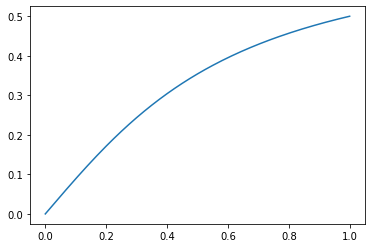

In [ ]:
plt.Figure(figsize=(10,10))
plt.plot(x_vals,y_vals)
plt.show()

In [120]:
def Eyler_modified(eq, y_0):
    acc=0.001
    # h = (1 - 0) / 10
    h=0.1
    x_vals = np.arange(0, 1+0.000001, h)
    y_vals=[y_0,]
    for i in range(len(x_vals)-1):
        y_vals.append(y_vals[i]+h*eq.subs([(x,x_vals[i]+h/2),(y,y_vals[i]+(h/2)*eq.subs([(x,x_vals[i]),(y,y_vals[i])]))]))
    
    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0
        y_vals_new=[y_0,]
        h_new=h_new/2
        x_vals_news = np.arange(0, 1+0.000001, h_new)
        for i in range(len(x_vals_news)-1):
            y_vals_new.append(y_vals_new[i]+h_new*eq.subs([(x,x_vals_news[i]+h/2),(y,y_vals_new[i]+(h/2)*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])]))]))
        # print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
        vals=[]

        for i in range(0,len(x_vals_news)+1,2):
            vals.append(y_vals_new[i])

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                              
        else:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break

        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

In [ ]:
x_vals,y_vals,h=Eyler_modified(eq,0)

In [ ]:
h,1/h

(0.00625, 160.0)

In [ ]:
for x_val,y_val in zip(x_vals,y_vals):
    print(f"{round(x_val,4)} {round(y_val,4)}")

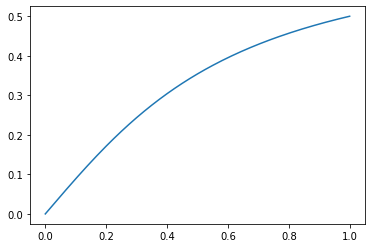

In [ ]:
plt.Figure(figsize=(10,10))
plt.plot(x_vals,y_vals)
plt.show()

In [94]:
def runge_kut(eq, y_0):
    acc=0.001
    h=0.1
    x_vals = np.arange(0, 1+0.000001, h)
    y_vals=[y_0,]
    for i in range(len(x_vals)-1):
        k1=h*eq.subs([(x,x_vals[i]),(y,y_vals[i])])
        k2=h*eq.subs([(x,x_vals[i]+h/2),(y,y_vals[i]+k1/2)])
        k3=h*eq.subs([(x,x_vals[i]+h/2),(y,y_vals[i]+k2/2)])
        k4=h*eq.subs([(x,x_vals[i]+h),(y,y_vals[i]+k3)])
        y_vals.append(y_vals[i]+(1/6)*(k1+2*k2+2*k3+k4))
        #print(f"{k1} {k2} {k3} {k4} {y_vals[i]+(1/6)*(k1+2*k2+2*k3+k4)} \n\n")
    #print(y_vals)
    # print(f"{len(x_vals)}  {len(y_vals)}\n\n")

    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0
        y_vals_new=[y_0,]
        h_new=h_new/2
        x_vals_news = np.arange(0, 1+0.000001, h_new)
        for i in range(len(x_vals_news)-1):
            k1=h_new*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])])
            k2=h_new*eq.subs([(x,x_vals_news[i]+h_new/2),(y,y_vals_new[i]+k1/2)])
            k3=h_new*eq.subs([(x,x_vals_news[i]+h_new/2),(y,y_vals_new[i]+k2/2)])
            k4=h_new*eq.subs([(x,x_vals_news[i]+h),(y,y_vals_new[i]+k3)])
            y_vals_new.append(y_vals_new[i]+(1/6)*(k1+2*k2+2*k3+k4))

            # y_vals_new.append(y_vals_new[i]+h_new*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])]))
            # print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
        vals=[]

        for i in range(0,len(x_vals_news)+1,2):
            vals.append(y_vals_new[i])

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                              
        else:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break

        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

In [ ]:
x_vals,y_vals,h=runge_kut(eq,0)

In [ ]:
h,1/h

(0.025, 40.0)

In [ ]:
for x_val,y_val in zip(x_vals,y_vals):
    print(f"{round(x_val,4)} {round(y_val,4)}")

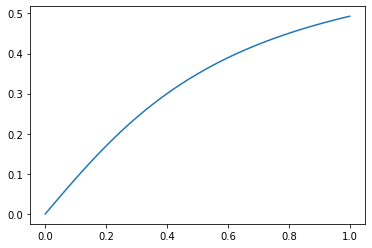

In [ ]:
plt.Figure(figsize=(10,10))
plt.plot(x_vals,y_vals)
plt.show()

# Тестовый пример

In [59]:
eq=-y

In [10]:
eq

-y

In [60]:
x_vals_eyler_simple,y_vals_eyler_simple,h=Eyler(eq,1)

In [61]:
h,1/h

(0.1, 10.0)

In [62]:
for x_val,y_val in zip(x_vals_eyler_simple,y_vals_eyler_simple):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9000
0.2 0.8100
0.3 0.7290
0.4 0.6561
0.5 0.5905
0.6 0.5314
0.7 0.4783
0.8 0.4305
0.9 0.3874
1.0 0.3487


In [63]:
h=0.1
x_vals_sol = np.arange(0, 1+0.000001, h)
y_vals_sol=[np.exp(-i) for i in x_vals_sol]

In [64]:
for x_val,y_val in zip(x_vals_sol,y_vals_sol):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1.0
0.1 0.9048
0.2 0.8187
0.3 0.7408
0.4 0.6703
0.5 0.6065
0.6 0.5488
0.7 0.4966
0.8 0.4493
0.9 0.4066
1.0 0.3679


In [65]:
x_vals_eyler_modified,y_vals_eyler_modified,h=Eyler_modified(eq,1)

In [66]:
h,1/h

(0.1, 10.0)

In [67]:
for x_val,y_val in zip(x_vals_eyler_modified,y_vals_eyler_modified):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9050
0.2 0.8190
0.3 0.7412
0.4 0.6708
0.5 0.6071
0.6 0.5494
0.7 0.4972
0.8 0.4500
0.9 0.4072
1.0 0.3685


In [83]:
x_vals_runge_kut,y_vals_runge_kut,h_runge_kut=runge_kut(eq,1)

In [84]:
h_runge_kut,1/h_runge_kut

(0.1, 10.0)

In [85]:
for x_val,y_val in zip(x_vals_runge_kut,y_vals_runge_kut):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9048
0.2 0.8187
0.3 0.7408
0.4 0.6703
0.5 0.6065
0.6 0.5488
0.7 0.4966
0.8 0.4493
0.9 0.4066
1.0 0.3679


In [80]:
y_vals_eyler_modified=y_vals_eyler_modified[:-1]

In [81]:
y_vals_eyler_modified

[1,
 0.905000000000000,
 0.819025000000000,
 0.741217625000000,
 0.670801950625000,
 0.607075765315625,
 0.549403567610641,
 0.497210228687630,
 0.449975256962305,
 0.407227607550886,
 0.368540984833552]

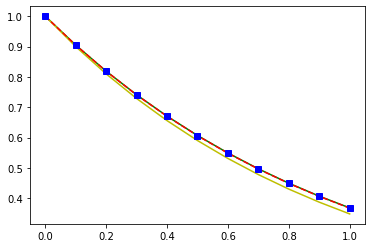

In [86]:
plt.Figure(figsize=(20,20))
plt.plot(x_vals_eyler_modified,y_vals_eyler_modified,color="g")
plt.plot(x_vals_eyler_simple,y_vals_eyler_simple,color="y")
plt.plot(x_vals_runge_kut,y_vals_runge_kut,'go--',color="r")
plt.plot(x_vals_sol,y_vals_sol,"rs",color="b")
plt.show()

# Вариант 8

In [117]:
eq

(0.9 - 0.9*y**2)/(2.5*x**2 + y**2 + 1)

In [95]:
x_vals_eyler_simple,y_vals_eyler_simple,h=Eyler(eq,0)

In [96]:
h,1/h

(0.00625, 160.0)

In [ ]:
for x_val,y_val in zip(x_vals_eyler_simple,y_vals_eyler_simple):
    print(f"{round(x_val,4)} {round(y_val,4)}")

In [115]:
for i in range(len(x_vals_eyler_simple)):
    if round(x_vals_eyler_simple[i],4) in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        print(f"{round(x_vals_eyler_simple[i],4)} {round(y_vals_eyler_simple[i],4)}")

0.0 0
0.1 0.0889
0.2 0.1714
0.3 0.2435
0.4 0.3041
0.5 0.3541
0.6 0.3951
0.7 0.4289
0.8 0.4569
0.9 0.4803
1.0 0.5000


In [121]:
x_vals_eyler_modified,y_vals_eyler_modified,h=Eyler_modified(eq,0)

In [122]:
h,1/h

(0.00625, 160.0)

In [ ]:
for x_val,y_val in zip(x_vals_eyler_modified,y_vals_eyler_modified):
    print(f"{round(x_val,4)} {round(y_val,4)}")

In [124]:
for i in range(len(x_vals_eyler_modified)):
    if round(x_vals_eyler_modified[i],4) in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        print(f"{round(x_vals_eyler_modified[i],4)} {round(y_vals_eyler_modified[i],4)}")

0.1 0.0864
0.2 0.1642
0.3 0.2310
0.4 0.2868
0.5 0.3331
0.6 0.3713
0.7 0.4031
0.8 0.4295
0.9 0.4518
1.0 0.4707


In [104]:
x_vals_runge_kut,y_vals_runge_kut,h_runge_kut=runge_kut(eq,0)

In [105]:
h_runge_kut,1/h_runge_kut

(0.025, 40.0)

In [ ]:
for x_val,y_val in zip(x_vals_runge_kut,y_vals_runge_kut):
    print(f"{round(x_val,4)} {round(y_val,4)}")

In [114]:
for i in range(len(x_vals_runge_kut)):
    if round(x_vals_runge_kut[i],4) in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        print(f"{round(x_vals_runge_kut[i],4)} {round(y_vals_runge_kut[i],4)}")

0.1 0.0883
0.2 0.1697
0.3 0.2405
0.4 0.3000
0.5 0.3491
0.6 0.3895
0.7 0.4228
0.8 0.4504
0.9 0.4735
1.0 0.4930


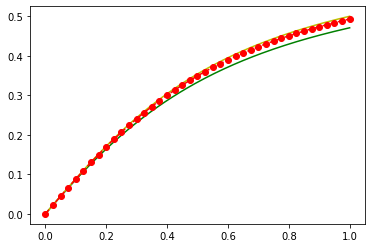

In [125]:
plt.Figure(figsize=(20,20))
plt.plot(x_vals_eyler_modified,y_vals_eyler_modified,color="g")
plt.plot(x_vals_eyler_simple,y_vals_eyler_simple,color="y")
plt.plot(x_vals_runge_kut,y_vals_runge_kut,'go--',color="r")
plt.show()

In [ ]:
# def Eyler(eq, y_0):
#     acc=0.001
#     h = 0.1
#     x_vals = np.arange(0, 1+0.000001, h)
#     y_vals=[y_0,]
#     for i in range(len(x_vals)-1):
#         y_vals.append(y_vals[i]+h*eq.subs([(x,x_vals[i]),(y,y_vals[i])]))
#     print(f"{len(x_vals)}  {len(y_vals)}\n\n")
#     h_new=h
#     k=2
#     flag=1
#     iter=0
#     while(flag==1):
#         flag=0
#         y_vals_new=[y_0,]
#         h_new=h_new/2
#         x_vals_news = np.arange(0, 1+0.000001, h_new)
#         for i in range(len(x_vals_news)-1):
#             y_vals_new.append(y_vals_new[i]+h_new*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])]))
#         print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
#         vals=[]
#         for i in range(0,len(x_vals_news)+1,k):
#             vals.append(y_vals_new[i])
        
#         k*=2
#         # print(vals)
#         # print("/n/n")
#         for i in range(len(vals)):
#             if abs(vals[i]-y_vals[i])-0.001>acc:
#                 print(abs(vals[i]-y_vals[i])-0.001)
#                 print(iter)
#                 flag=1
#                 break
                

#         if iter==0 and flag==0:
#             return x_vals,y_vals    
#         iter+=1    
        
#     return x_vals_news,y_vals_new

In [ ]:
# x_vals,y_vals=Eyler(eq,0)

In [ ]:
# for x_val,y_val in zip(x_vals,y_vals):
#     print(f"{round(x_val,4)} {round(y_val,4)}")